<a href="https://colab.research.google.com/github/nitrohub/Final-year-project/blob/master/Removing_punct_and_Using_all_words_of_reviews_of_Final_Extensible_dictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
#Installing all the packages
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import pandas as pd
import re

!pip install spatial
import spatial
from scipy.spatial import distance

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
import sys

In [158]:
from google.colab import files
uploaded = files.upload()

Saving seed23.txt to seed23 (7).txt


In [159]:
file_name = "seed23.txt"
uploaded[file_name].decode("utf-8")

'bad\r\nproblem\r\npoor\r\nterrible\r\nunresponsive\r\ndiminished\r\nminiscule\r\nrude\r\noutrageous\r\nterrific\r\nhorrible\r\nunfriendly\r\nterrified\r\nscowled\r\nyelled\r\ndispleased\r\ntempered\r\nunhappy\r\ndirty\r\nseverly\r\ndreary\r\ndesperate\r\naccused\r\nhumiliated\r\nvaguest\r\nridiculously\r\nugly\r\noverpriced\r\nrecession\r\nstressful\r\noutrageously\r\npoor\r\nmiserable\r\ncranky\r\nunappetizing\r\ndisappointed\r\nblindfolded\r\ndisgusted\r\nwarning\r\nsnubbed\r\ninept\r\nrepulsive\r\nscurrying\r\npungent\r\nmold\r\narrogant\r\ncallous\r\nawkward\r\nexcellent\r\nrelaxed\r\nwonderful\r\nthumbs\r\nheartbeat\r\nbest\r\nmassive\r\nelite\r\nclassy\r\nelegant\r\noutstanding\r\nstars\r\nmagnificent\r\nhomey\r\naffordable\r\nequipped\r\nblowing\r\nextravagant\r\ncozy\r\nfriendly\r\nprofessional\r\ngreat\r\nfantastic\r\ndelicious\r\nincredibly\r\nstaff\r\nbeauty\r\nrelieved\r\ncomplimentary\r\nheart\r\npriceless\r\ndefinitely\r\nrecommended\r\ngorgeous\r\nguarantees\r\ncelebrit

In [0]:
seed = uploaded[file_name].decode("utf-8").split("\r\n")
seed = [[i for i in seed]]

In [0]:
# model_for_spam_words = Word2Vec(seed,min_count=1)
# print(model_for_spam_words.vocabulary)

In [162]:
#importing the dataset
from google.colab import files
uploaded = files.upload()


Saving Labelleddataset.csv to Labelleddataset (6).csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Labelleddataset.csv']))

In [164]:
count= 0
reviews = [[i] for i in df2['text']]
print("Number of reviews=",len(reviews))

Number of reviews= 1600


In [165]:
print(reviews[0][0])

We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... 



In [0]:
texts = []

for review in reviews:
  temp = re.sub(r'\[[0-9]*\]',' ',review[0])
  temp = re.sub(r'\s+',' ',temp)
  temp = temp.lower()
  temp = re.sub(r'\d',' ',temp)
  texts.append(re.sub(r'\s+',' ',temp)) 

In [0]:
sentences=[]
for text in texts:
  sentence = nltk.sent_tokenize(text)
  sentences.append(sentence)

# for sentence in sentences:
#   print(sentence)


In [0]:
word_tokenized_reviews = []

for review in sentences:
  temp = [nltk.word_tokenize(sentence) for sentence in review]
  word_tokenized_reviews.append(temp)

# for review in word_tokenized_reviews:
#   print(review)

In [0]:
#Removing all the stopwords and the punctuations
for review in word_tokenized_reviews:   # the review will contain [[sentence],[sentence]]
  for i in range(len(review)):
    review[i] = [word for word in review[i] if word not in stopwords.words('english')]  #represents each sentence
    table = str.maketrans("","",string.punctuation)
    stripped = [w.translate(table) for w in review[i]]
    review[i] = stripped

# print(review[0])


![alt text](https://)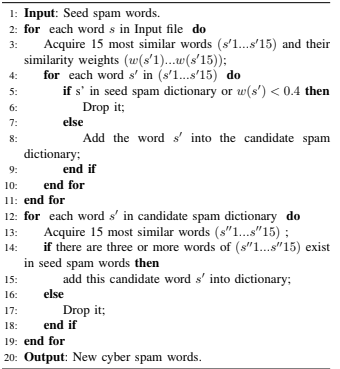

In [170]:
forTraining = []
for i in word_tokenized_reviews: # for each review
  for j in i: #for each sentence
    forTraining.append(j)  #appending each sentence


# print("For training = ",forTraining[0])

model_for_reviews = Word2Vec(forTraining,min_count=1)
print(model_for_reviews)

Word2Vec(vocab=9684, size=100, alpha=0.025)


In [0]:
# for i in word_tokenized_reviews:
#   print(i)

# print(model_for_reviews.wv["most"])

In [177]:
# for each review in word_tokenized_reviews
count=0
additional_words=[]
for it in range(100):#for each review
  print("Iteration="+str(it))
  selected_review   = word_tokenized_reviews[it]  #selecting the review to be operated upon
  candidate_spam_dictionary = []  #intermediate dictionary
  for i in seed[0]: #for each word in seed spam dictionary
    dissimilarity_weights = []  #for finding the dissimilarity between the word in seed spam dictionary and the words in the reviews
    try:
      v_spam = model_for_reviews.wv[i]  #finding vector of each seed spam word
    except Exception as e:
      print(e)
    for j in range(len(selected_review)):  #for each sentence in selected review
      for k in selected_review[j]:         #for each word in the sentence
        try:
          v_review = model_for_reviews.wv[k]  #converting each word of the sentence into vector
        except:
          print("There is problem in review")
        dissim=distance.cosine(v_spam,v_review) #calculating the cosine distance
        dissimilarity_weights.append([i,k,dissim])   #dissimilarity weights for each review word
    s = sorted(dissimilarity_weights, key = lambda x: (x[2]))   #sorting the dissimilarity weights of the words from seed words for the entire review
    s_dash = []
    for j in range(0,15): #appending 15 most similar words to the s_dash
      s_dash.append(s[j])
    for j in range(0,15): #for each word in s_dash
      if((s_dash[j][1] not in seed[0]) and (1-s_dash[j][2]>=0.4)):# if s_dash is already present in the dictionary or similarity < 0.4 discard it 1-s_dash becoz its dissimilarity
        if s_dash[j][1]!="":
          candidate_spam_dictionary.append(s_dash[j][1])
  print("Candidate Spam dictionary:",candidate_spam_dictionary)  #[k] only

  for i in candidate_spam_dictionary:  #for each word in candidate spam dictionary
    dissimilarity_weights   = []
    v_candidate_dictionary  = model_for_reviews.wv[i]  #vector of each candidate spam word because the candidate spam words has been extracted from the reviews
    for j in range(len(selected_review)):  #for each sentence in the selected review
      for k in selected_review[j]: #for each word in selected sentence
        v_review = model_for_reviews.wv[k]  #converting each word of the sentence into vector
        dissim=distance.cosine(v_candidate_dictionary,v_review) #calculating the dissimilarity
        dissimilarity_weights.append([i,k,dissim])   #dissimilarity weights for each review word

    s = sorted(dissimilarity_weights, key = lambda x: (x[2]))  #sorting the dissimilarity weights of the words from seed words for the entire review
    s_double_dash = []
    for j in range(0,15): #Appending 15 most similar words
      s_double_dash.append(s[j][1]) # s_double_dash and s will be three dimensional array [k],storing only append 15 most similar words to s_dash
    # print(s_double_dash) #printing the 15 words similar to the canidate spam dictionary
    if (len(set(s_double_dash) & set(seed[0]))>=3):#if there are 3 or more than 3 words in the seed dictionary then add the word of candidate spam dictionary to the seed spam dictionary
      if i not in seed[0]:
        seed[0].append(i)
        additional_words.append(i)
        print("Word included=",i)
        # system.exit(1)      


Iteration=0
Candidate Spam dictionary: ['rate', 'four', 'four', 'kids', 'water', 'beat', 'worth', 'getaway', 'fine', 'complete', 'friday', 'aaa', 'pricey', 'tables', 'tub', 'hours', 'slow', 'morning', 'though', 'restaurant', 'complete', 'adults', 'tub', 'tv', 'tables', 'even', 'pricey', 'plasma', 'breakfast', 'complete', 'fine', 'rate', 'kids', 'pricey', 'beat', 'tables', 'tub', 'water', 'four', 'four', 'adults', 'restaurant', 'morning', 'friday', 'restaurant', 'complete', 'pricey', 'slow', 'tub', 'though', 'food', 'tables', 'fine', 'hours', 'breakfast', 'morning', 'adults', 'tv', 'wait', 'concierge', 'even', 'slow', 'hours', 'us', 'plasma', 'though', 'tv', 'restaurant', 'morning', 'adults', 'breakfast', 'tub', 'four', 'four', 'getaway', 'kids', 'worth', 'beat', 'aaa', 'water', 'rate', 'one', 'friday', 'tables', 'complete', 'fine', 'family', 'us', 'concierge', 'service', 'wait', 'even', 'room', 'slow', 'plasma', 'hours', 'kids', 'friday', 'complete', 'rate', 'water', 'fine', 'four', 'f

In [178]:
print(len(additional_words))
print(additional_words)

1344
['desk', 'solely', 'huge', 'good', 'breakfast', 'including', 'superb', 'connected', 'members', 'rate', 'luxurious', 'sure', 'winter', 'mall', 'imagine', 'first', 'honors', 'go', 'time', 'location', 'next', 'hilton', 'hotel', 'would', 'stay', 'chicago', 'though', 'hours', 'new', 'friends', 'upon', 'arrival', 'several', 'early', 'breeze', 'ready', 'feeling', 'even', 'free', 'water', 'bottled', 'check', 'city', 'nice', 'conrad', 'view', 'nights', 'reunion', 'stayed', 'room', 'clean', 'date', 'way', 'beautiful', 'every', 'ca', 'attached', 'wait', 'impressed', 'high', 'standards', 'nt', 'please', 'perfect', 'loved', 'pleasing', 'nordstrom', 'hard', 'back', 'really', 's', 'boyfriend', 'usually', 'amount', 'closer', 'reminded', 'area', 'w', 'second', 'anything', 'look', 'means', 'see', 'white', 'building', 'sound', 'none', 'enough', 'quite', 'side', 'actually', 'feel', 'tub', 'slippers', 'walked', 'robes', 'immediately', 'us', 'plasma', 'tv', 'got', 'think', 'anniversary', 'come', 'separ